In [108]:
'''Publicly traded companies are usually grouped under small cap, mid-cap, and large cap 
companies with their growth dimension as value, core, and growth stocks.
1. Using market capitalization and price per earnings growth as metrics run clustering using 
K-means algorithm on companies traded in Russell 2000 index with 9 clusters. Compare 
the cluster positioning of your favorite companies with that of the Morningstar rating for 
those companies. Plot these clusters and see how these boundaries are matching with 
your expectations. 
2. Assign labels to the clusters in the companies with their growth and capitalization based 
on K-means analysis or Morningstar analysis. Select a new company stock that you may 
be interested in and classify the stock using KNN technique.
Remarks
● You may use Yahoo Finance or Bloomberg Terminals to obtain the data.
● Data collection may take some time.
● See page 76 of the Textbook 1 for more information. 
● Provide your Python code and results in your report.
'''



'Publicly traded companies are usually grouped under small cap, mid-cap, and large cap \ncompanies with their growth dimension as value, core, and growth stocks.\n1. Using market capitalization and price per earnings growth as metrics run clustering using \nK-means algorithm on companies traded in Russell 2000 index with 9 clusters. Compare \nthe cluster positioning of your favorite companies with that of the Morningstar rating for \nthose companies. Plot these clusters and see how these boundaries are matching with \nyour expectations. \n2. Assign labels to the clusters in the companies with their growth and capitalization based \non K-means analysis or Morningstar analysis. Select a new company stock that you may \nbe interested in and classify the stock using KNN technique.\nRemarks\n● You may use Yahoo Finance or Bloomberg Terminals to obtain the data.\n● Data collection may take some time.\n● See page 76 of the Textbook 1 for more information. \n● Provide your Python code and resu

In [15]:
## (1)  get all the component stocks in Russell 2000 index
import pandas as pd
import numpy as np


components = pd.read_excel('RTY_data.xlsx')

components = components .replace('--', np.nan)
components.fillna(components.median(),inplace=True)


print(components)
stock_list=list(components['Ticker'])
print(stock_list)


     Ticker Unnamed: 1 Unnamed: 2   Price  BEst PEG Ratio:Y\n  \
0      TGTX         UR     Equity  23.480            1.219984   
1      AXNX         UW     Equity  70.140            3.109805   
2       WGS         UW     Equity  60.250            1.501337   
3      ULCC         UW     Equity   6.985            1.501337   
4      RELY         UW     Equity  14.640            2.770410   
...     ...        ...        ...     ...                 ...   
1967   SSRM         UW     Equity   6.230           -0.329804   
1968    PBF         UN     Equity  32.490            1.501337   
1969   BEAM         UW     Equity  22.050            1.501337   
1970   CATX         UA     Equity  11.960            1.501337   
1971   FOLD         UQ     Equity  11.685            1.501337   

      Market Cap LF\n  P/B 5Yr Avg LF\n  P/S 5Yr Avg LF\n  \
0        2.754471e+09         29.274418         35.469791   
1        3.429709e+09          4.959128          8.200708   
2        7.038557e+08          1.196

/var/folders/g6/wv24kw114hx69hw85ldl4kw40000gn/T/ipykernel_34355/2268173866.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  components.fillna(components.median(),inplace=True)


      BEst PEG Ratio:Y\n  Market Cap LF\n
0              -0.072515         0.718456
1               0.117922         1.118960
2              -0.044163        -0.497824
3              -0.044163        -0.258918
4               0.083721         1.255212
...                  ...              ...
1967           -0.228686        -0.373590
1968           -0.044163         2.282367
1969           -0.044163         0.229621
1970           -0.044163        -0.516583
1971           -0.044163         0.828840

[1972 rows x 2 columns]


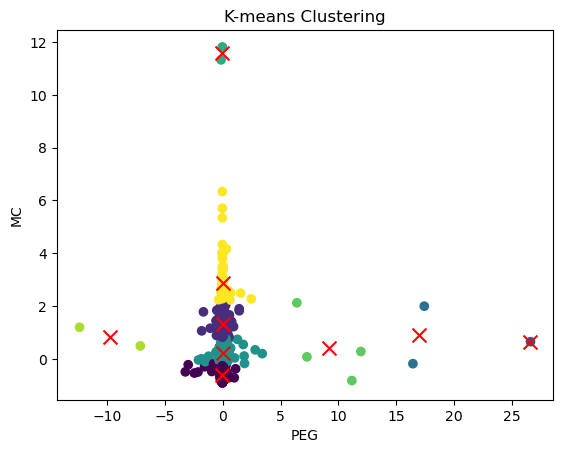

In [16]:
#2. Using market capitalization and price per earnings growth as metrics run clustering using 
# K-means algorithm on companies traded in Russell 2000 index with 9 clusters. 
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Example data

df = components[['BEst PEG Ratio:Y\n','Market Cap LF\n']]

#df_cleaned = df.drop(df[(df == 0).any(axis=1)].index)
#df=df_cleaned

df= df.replace('--', np.nan)
df.fillna(df.median(),inplace=True)


df[['BEst PEG Ratio:Y\n','Market Cap LF\n']]=scaler.fit_transform(df[['BEst PEG Ratio:Y\n','Market Cap LF\n']])
print(df)

k = 9

# Fit the model
kmeans = KMeans(n_clusters=k)
kmeans.fit(df)

# Add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Plot the data points, coloring by cluster
plt.scatter(df['BEst PEG Ratio:Y\n'], df['Market Cap LF\n'], c=df['cluster'], cmap='viridis')

# Plot the centroids
centroids = kmeans.cluster_centers_


plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

plt.xlabel('PEG')
plt.ylabel('MC')
plt.title('K-means Clustering')
plt.show()


In [17]:
print(df)

      BEst PEG Ratio:Y\n  Market Cap LF\n  cluster
0              -0.072515         0.718456        4
1               0.117922         1.118960        1
2              -0.044163        -0.497824        0
3              -0.044163        -0.258918        0
4               0.083721         1.255212        1
...                  ...              ...      ...
1967           -0.228686        -0.373590        0
1968           -0.044163         2.282367        8
1969           -0.044163         0.229621        4
1970           -0.044163        -0.516583        0
1971           -0.044163         0.828840        1

[1972 rows x 3 columns]


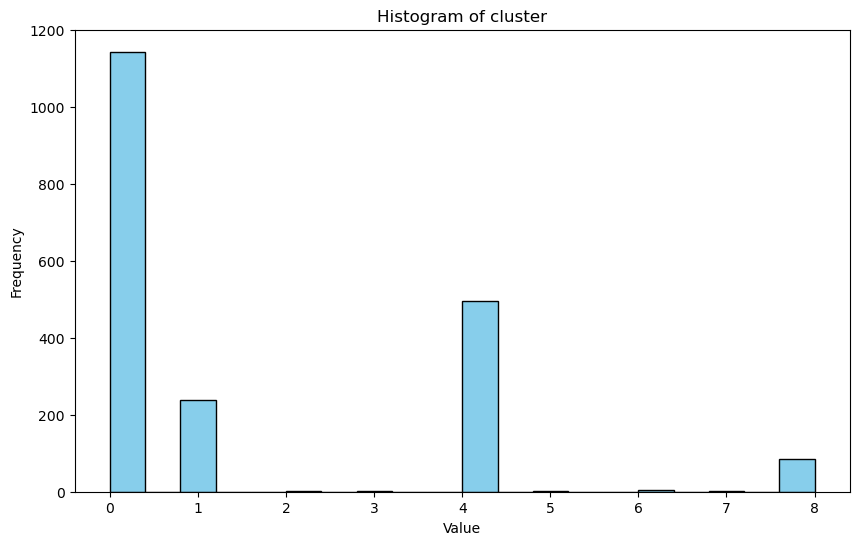

         BEst PEG Ratio:Y\n  Market Cap LF\n
cluster                                     
0                 -0.055505        -0.606273
1                 -0.024662         1.303499
2                 26.617506         0.655492
3                 16.937403         0.912029
4                 -0.023823         0.230492
5                 -0.099309        11.567308
6                  9.196670         0.419959
7                 -9.767273         0.848791
8                  0.042641         2.850256


In [18]:
#df['cluster'].describe()

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column
plt.figure(figsize=(10, 6))
plt.hist(df['cluster'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of cluster')
plt.show()


result = df.groupby('cluster')[['BEst PEG Ratio:Y\n','Market Cap LF\n']].mean()
print(result)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

X = df[['BEst PEG Ratio:Y\n','Market Cap LF\n']]
y = df['cluster']

print(df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train),len(X_test))
# Create and fit the kNN model
k_neighbors = 9  # You can adjust this value
knn = KNeighborsClassifier(n_neighbors=k_neighbors)
knn.fit(X_train, y_train)

#print(X_test.describe())
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Output the accuracy
print("Accuracy of kNN on test set:", accuracy)



# New data point for prediction (example)
new_data = np.array([[3.109805,2.754471e+09],[3.614406,3.429709e+09],[3.614406,7.038557e+08], [2.770410,1.106645e+09],[-0.329804,3.659426e+09]]) 
## Scale the new data



means = np.array([components['BEst PEG Ratio:Y\n'].mean(), components['Market Cap LF\n'].mean()]) 
stds = np.array([components['BEst PEG Ratio:Y\n'].std(), components['Market Cap LF\n'].std()])     

standardized_arr = (new_data - means) / stds
print(new_data)
print(standardized_arr)
# Make prediction
predicted_cluster = knn.predict(standardized_arr)

# Output the predicted cluster
print("Predicted cluster:", predicted_cluster)


      BEst PEG Ratio:Y\n  Market Cap LF\n  cluster
0              -0.072515         0.718456        4
1               0.117922         1.118960        1
2              -0.044163        -0.497824        0
3              -0.044163        -0.258918        0
4               0.083721         1.255212        1
...                  ...              ...      ...
1967           -0.228686        -0.373590        0
1968           -0.044163         2.282367        8
1969           -0.044163         0.229621        4
1970           -0.044163        -0.516583        0
1971           -0.044163         0.828840        1

[1972 rows x 3 columns]
1380 592
Accuracy of kNN on test set: 0.9797297297297297
[[ 3.109805e+00  2.754471e+09]
 [ 3.614406e+00  3.429709e+09]
 [ 3.614406e+00  7.038557e+08]
 [ 2.770410e+00  1.106645e+09]
 [-3.298040e-01  3.659426e+09]]
[[ 0.11789162  0.71827412]
 [ 0.16872715  1.11867617]
 [ 0.16872715 -0.49769798]
 [ 0.0836996  -0.25885233]
 [-0.22862842  1.25489356]]
Predicted clus

/Users/joansophia/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


      Growth-Value  marketcap
0        96.316407  12.762913
1        85.866891  15.912356
2        74.562303   3.198444
3        68.705796   5.077134
4        59.680733  16.983802
...            ...        ...
1967     22.435702   4.175386
1968     21.380110  25.061040
1969     33.350765   8.918861
1970      6.989223   3.050931
1971     -3.741757  13.630937

[1972 rows x 2 columns]
      Growth-Value  marketcap col1_group col2_group
0        96.316407  12.762913          3          3
1        85.866891  15.912356          3          3
2        74.562303   3.198444          3          2
3        68.705796   5.077134          3          2
4        59.680733  16.983802          3          3
...            ...        ...        ...        ...
1967     22.435702   4.175386          1          2
1968     21.380110  25.061040          1          3
1969     33.350765   8.918861          2          3
1970      6.989223   3.050931          1          2
1971     -3.741757  13.630937          1   

/var/folders/g6/wv24kw114hx69hw85ldl4kw40000gn/T/ipykernel_34355/342734602.py:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.fillna(data1.median(),inplace=True)


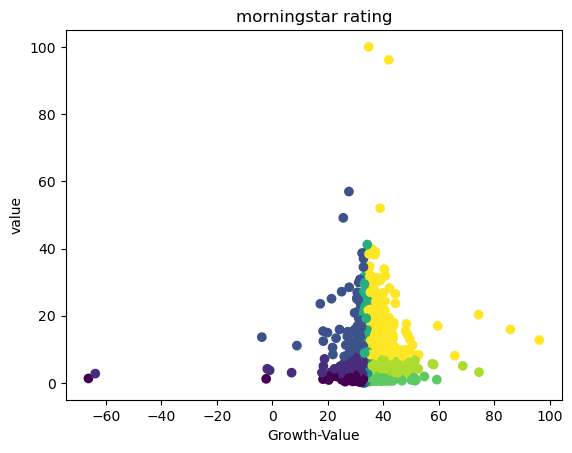

the mean value for each cluster:
                Growth-Value  marketcap
combined_group                         
1                  30.561559   1.311850
2                  30.251765   4.456648
3                  30.524328  14.834885
4                  33.447727   1.282281
5                  33.447085   4.478927
6                  33.577929  15.147599
7                  38.233778   1.306461
8                  38.440578   4.537509
9                  38.831197  16.191298


In [21]:
import matplotlib.pyplot as plt
##morningstar rating
'''
Forward-looking measures 
Price-to-projected earnings 50.0%  "BEst P/E BF12M"

Historically based measures 
Price-to-book 12.5%   "P/B 5Yr Avg LF"
Price-to-sales 12.5%   "P/S 5Yr Avg LF"
Price-to-cashflow 12.5%  "P/CF 5Yr Avg LF"
Dividend yield 12.5%   "Dvd Ind Yld"



Forward-looking measures 
Long-term projected earnings growth 50.0%  "BEst Est LTG EPS"	

Historically based measures
Historical earnings growth 12.5%   "Basic EPS - 5 Year Average Growth LF"
Sales growth 12.5%   "Rev Gr Adj 5Y CAGR LF"
Cashflow growth 12.5%  "CF/Sh - 5 Yr Geo Gr LF"
Book value growth 12.5%  "BV - 5 Yr Geo Gr LF"

'''
import pandas as pd
import numpy as np
data1=pd.read_excel('RTY_data.xlsx')
data1= data1.replace('--', np.nan)
data1.fillna(data1.median(),inplace=True)
#print(data1)
			 	
data1.drop(['Ticker','Unnamed: 1',  'Unnamed: 2','Price'  ], axis=1, inplace=True)
for column in data1:
    #print(data1[column].mean())
    data1[column]=(data1[column]-data1[column].mean())/data1[column].std()

#print(data1)

data1['value']=data1["P/B 5Yr Avg LF\n"]*0.125+data1["P/S 5Yr Avg LF\n"]*0.125+data1["P/CF 5Yr Avg LF\n"]*0.125+data1["Dvd Ind Yld\n"]*0.125+data1["BEst P/E BF12M\n"]*0.5 

data1['growth']=data1["Basic EPS - 5 Year Average Growth LF\n"]*0.125+data1["BV - 5 Yr Geo Gr LF\n"]*0.125+data1["CF/Sh - 5 Yr Geo Gr LF\n"]*0.125+data1["Rev Gr Adj 5Y CAGR LF\n"]*0.125+data1["BEst Est LTG EPS\n"]*0.5

data1['value']=(data1['value']-data1['value'].min())/(data1['value'].max()-data1['value'].min())*100
data1['growth']=(data1['growth']-data1['growth'].min())/(data1['growth'].max()-data1['growth'].min())*100



data1['Growth-Value']=data1['growth']-data1['value']
data1['marketcap']=(data1['Market Cap LF\n']-data1['Market Cap LF\n'].min())/(data1['Market Cap LF\n'].max()-data1['Market Cap LF\n'].min())*100
data1=data1[['Growth-Value','marketcap']]

print(data1)
#print(data1.describe())


col1_quantiles = data1['Growth-Value'].quantile([1/3, 2/3])
col2_quantiles = data1['marketcap'].quantile([1/3, 2/3])

# groups
data1['col1_group'] = pd.cut(data1['Growth-Value'], bins=[-np.inf, col1_quantiles[1/3], col1_quantiles[2/3], np.inf], labels=[1, 2, 3])
data1['col2_group'] = pd.cut(data1['marketcap'], bins=[-np.inf, col2_quantiles[1/3], col2_quantiles[2/3], np.inf], labels=[1, 2, 3])

print(data1)

data1['col1_group'] = data1['col1_group'].astype(int)
data1['col2_group'] = data1['col2_group'].astype(int)

# Mapping dictionary
group_map = {
    (1, 1): 1, (1, 2): 2, (1, 3): 3,
    (2, 1): 4, (2, 2): 5, (2, 3): 6,
    (3, 1): 7, (3, 2): 8, (3, 3): 9
}

# Map groups to 1-9 categories
data1['combined_group'] = data1.apply(lambda row: group_map[(row['col1_group'], row['col2_group'])], axis=1)

print(data1[['Growth-Value', 'marketcap', 'col1_group', 'col2_group', 'combined_group']])


# Plot the data points, coloring by cluster
plt.scatter(data1['Growth-Value'], data1['marketcap'], c=data1['combined_group'], cmap='viridis')



plt.xlabel('Growth-Value')
plt.ylabel('value')
plt.title('morningstar rating')
plt.show()

print("the mean value for each cluster:" )
result = data1.groupby('combined_group')[['Growth-Value', 'marketcap']].mean()
print(result)